# Dataset Analysis: Top 5 Summary of IMDb Top 100 Movies

**Group 10** Member/s:

*   BONGALOS, Neilkon
*   GUEVARRA, Josemaria E.


#Data Gathering



The "**IMDb Top 100 Movies**" dataset, sourced from ***Kaggle***, encompasses information on the top 100 movies, including details such as movie name, year of release, category, runtime, genre, IMDb rating, votes, and total gross. This dataset enables us to condense the extensive list by highlighting the top 5 entries in each column. Beyond summarization, the dataset facilitates the analysis of pertinent questions, laying the groundwork for potential future investigations.

In [1]:
#to import pandas data analysis library and numPy library in this notebook
import pandas as pd
import numpy as np

In [2]:
#import matplotlib and seaborn library in this notebook
import matplotlib.pyplot as plt
import seaborn as sns
#define inline plotting
%matplotlib inline
#import warnings to alert if there are any error
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import re to work with regular expressions
import re

#Cleansing

In this procedure, ensuring the integrity of our dataset through data cleansing is imperative. We aim to eliminate typos, irrelevant entries, and duplicates. Our approach involves a meticulous manual check using Python coding, prioritizing accuracy and precision without relying on third-party applications.

In [4]:
#allow google colab to import and make use of the dataset
url = 'https://raw.githubusercontent.com/smurfmigos/datasci/main/movies.csv'
df = pd.read_csv(url)

In [5]:
#load csv file as pandas dataframe
df=pd.read_csv(url)

In [6]:
#show data
df

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M
...,...,...,...,...,...,...,...,...,...
94,95.0,The Usual Suspects,(1995),R,106 min,"Crime, Drama, Mystery",8.5,"1,087,832",$23.34M
95,96.0,Cool Hand Luke,(1967),GP,127 min,"Crime, Drama",8.1,"178,888",$16.22M
96,97.0,Eternal Sunshine of the Spotless Mind,(2004),R,108 min,"Drama, Romance, Sci-Fi",8.3,"1,011,004",$34.40M
97,98.0,City Lights,(1931),G,87 min,"Comedy, Drama, Romance",8.5,"186,059",$0.02M


The acquired dataset is currently functioning effectively. To guarantee its perfection, let's conduct a thorough examination to ensure its quality and accuracy.

In [7]:
#print information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            99 non-null     float64
 1   movie_name       99 non-null     object 
 2   year_of_release  99 non-null     object 
 3   category         99 non-null     object 
 4   run_time         99 non-null     object 
 5   genre            99 non-null     object 
 6   imdb_rating      99 non-null     float64
 7   votes            99 non-null     object 
 8   gross_total      98 non-null     object 
dtypes: float64(2), object(7)
memory usage: 7.1+ KB


In [8]:
#remove rows that contains null
df.dropna(inplace=True)

In [9]:
#detect missing values
df.isna()

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


In [10]:
#show the number of rows and columns
df.shape

(98, 9)

#Exploratory Data Analysis (EDA)



From the movies information provided by the dataset, it is interesting to find out what kind of movies that obtain high IMDb rating along with its gross. With this statement, we will be able to know what movies are tend to get a huge success. The general problem statement will be to determine what type of movies obtain high IMDb rating and high gross. With the problem statement, we are able to form questions that will help us to form a conclusion:

1.   What are the top 5 movie categories and genres?
2.   What are the top 5 movies in terms of IMDb rating and gross?
3.   Does it mean high IMDb rating is also high gross?

In [11]:
df.describe

<bound method NDFrame.describe of     index                                      movie_name year_of_release  \
0     1.0                                   The Godfather          (1972)   
1     2.0                        The Silence of the Lambs          (1991)   
2     3.0  Star Wars: Episode V - The Empire Strikes Back          (1980)   
3     4.0                        The Shawshank Redemption          (1994)   
4     5.0                                     The Shining          (1980)   
..    ...                                             ...             ...   
94   95.0                              The Usual Suspects          (1995)   
95   96.0                                  Cool Hand Luke          (1967)   
96   97.0           Eternal Sunshine of the Spotless Mind          (2004)   
97   98.0                                     City Lights          (1931)   
98   99.0                                      The Matrix          (1999)   

   category run_time                     

This is the description of the dataframe we use. With this, we are able to inspect the properties we will utilize. Most of the columns will be used to form a conclusion for our problem statement.

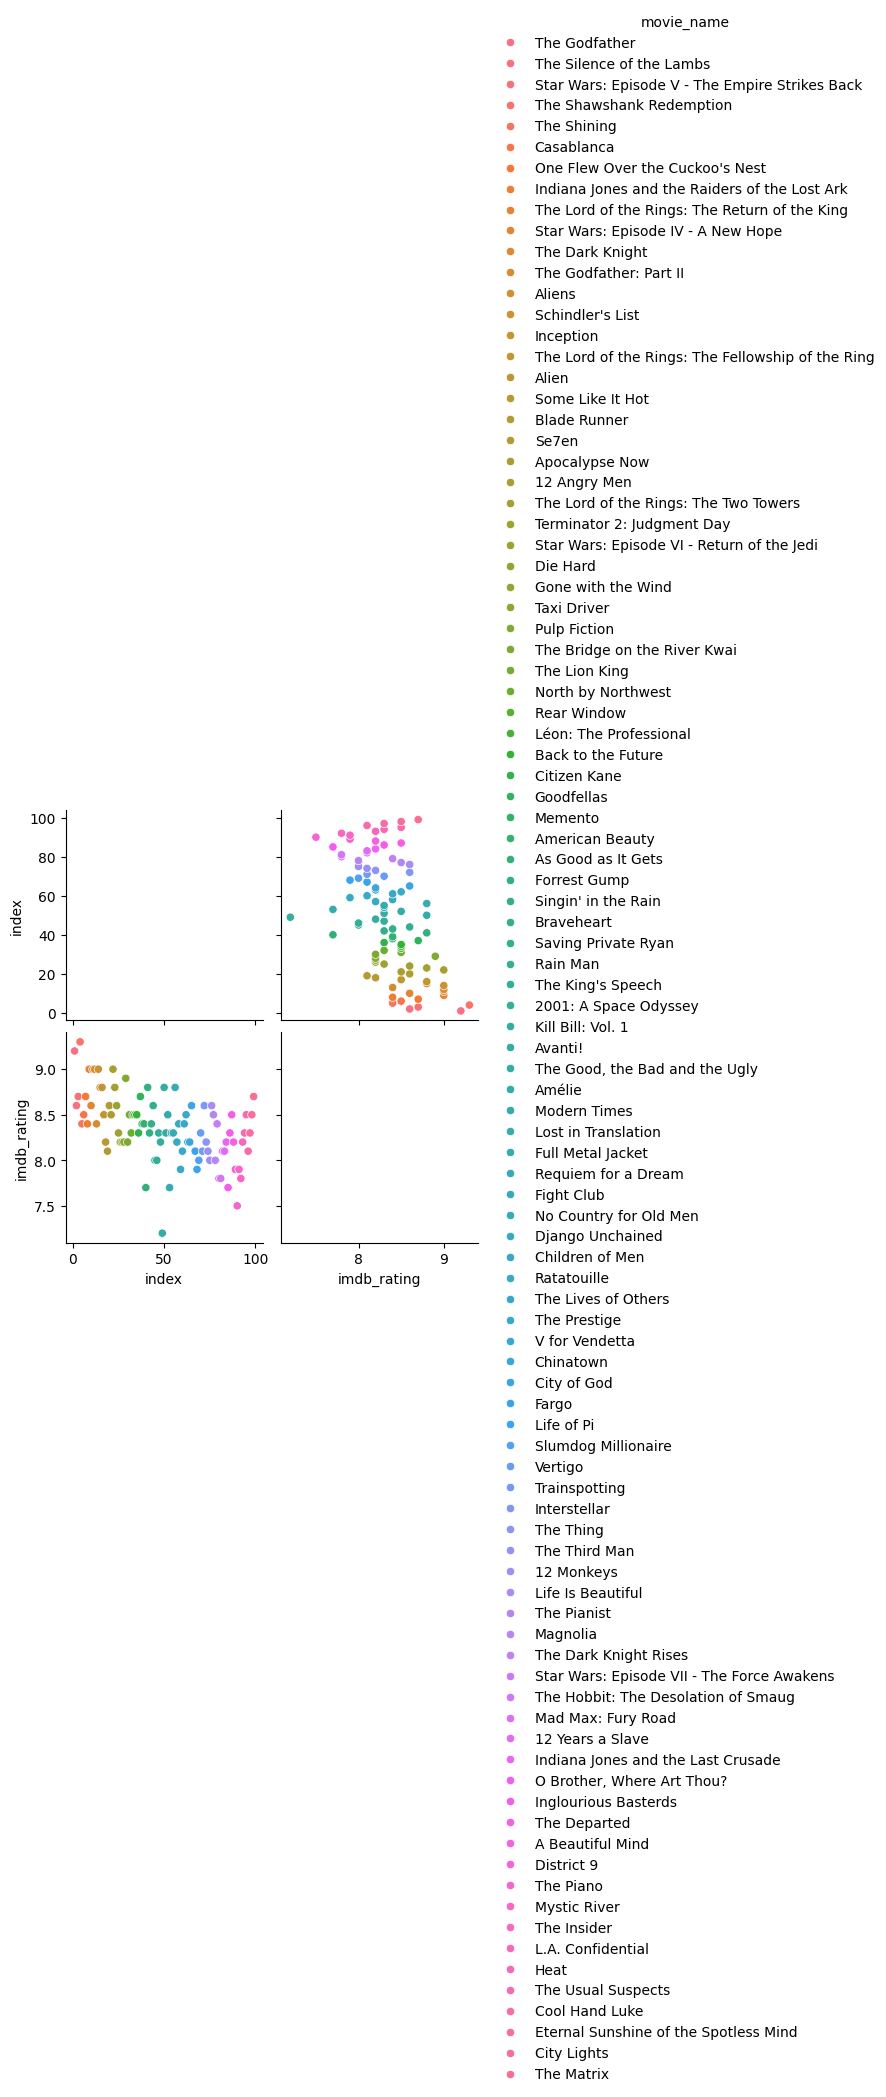

In [12]:
#code
sns.pairplot(df, hue='movie_name')

This overall graph is basically the summary of the dataset using visual representation. The dots portray the movies and it shows each of the columns data on every movie included in the list.

The features we will be including are the following:

*   **Top 5 Movie Categories**
*   **Top 5 Movie Genres**
*   **Top 5 Highest IMDb Rating**
*   **Top 5 Lowest IMDb Rating**
*   **Top 5 Highest Grossing Movies**
*   **Top 5 Lowest Grossing Movies**

These are the only features we will be showing as these are what we only need to answer the problem statement.

For our data visualization, we will be using only certain columns as those are only what we need to know to answer the problem statement along with its questions. The variables such as the movie_names, imdb_rating, gross_total, category, ang genre will be utilized for the modelling. The variable movie_names will be used in every field as it is subject for every questions we will answer. The variables imdb_rating ang gross_total will be used also to get the conclusion. The variables category and genre are then be utilized to obtain information required to answer other questions.

#Modeling

For the modelling, we will be using the said variables in data visualization. The features we will be showing are:

*   **Top 5 Movie Categories**
*   **Top 5 Movie Genres**
*   **Top 5 Highest IMDb Rating**
*   **Top 5 Lowest IMDb Rating**
*   **Top 5 Highest Grossing Movies**
*   **Top 5 Lowest Grossing Movies**

With these libraries in place, we are well-equipped to draw conclusive insights addressing the problem statement. Furthermore, the features at our disposal enable us to respond comprehensively to the associated questions guiding our problem statement..


---


Next in our modeling phase, we classify each column in the designated dataset, setting the groundwork for a systematic examination to extract meaningful insights and draw informed conclusions.

In [13]:
gross = df.gross_total.apply(lambda x: int(''.join(re.findall(r'[0-9]',str(x)))))
df.gross_total = gross

df.year_of_release = df.year_of_release.apply(lambda x: int(''.join(re.findall(r'[0-9]',str(x)))))

df.run_time = df.run_time.apply(lambda x: int(''.join(re.findall(r'[0-9]',str(x)))))

df.imdb_rating = df.imdb_rating.apply(lambda x: float(x))

df.run_time = df.run_time.apply(lambda x: int(''.join(re.findall(r'[0-9]',str(x)))))


In our modeling process, we utilize essential libraries such as pandas and numpy for data manipulation, and matplotlib along with seaborn for visualization. Inline plotting, warnings for error identification, and the re library for regular expressions are also incorporated. These libraries are imported at the beginning of our data gathering phase, providing a comprehensive toolkit for effective modeling.



---


**Top 5 Movie Categories**

array([<Axes: ylabel='category'>], dtype=object)

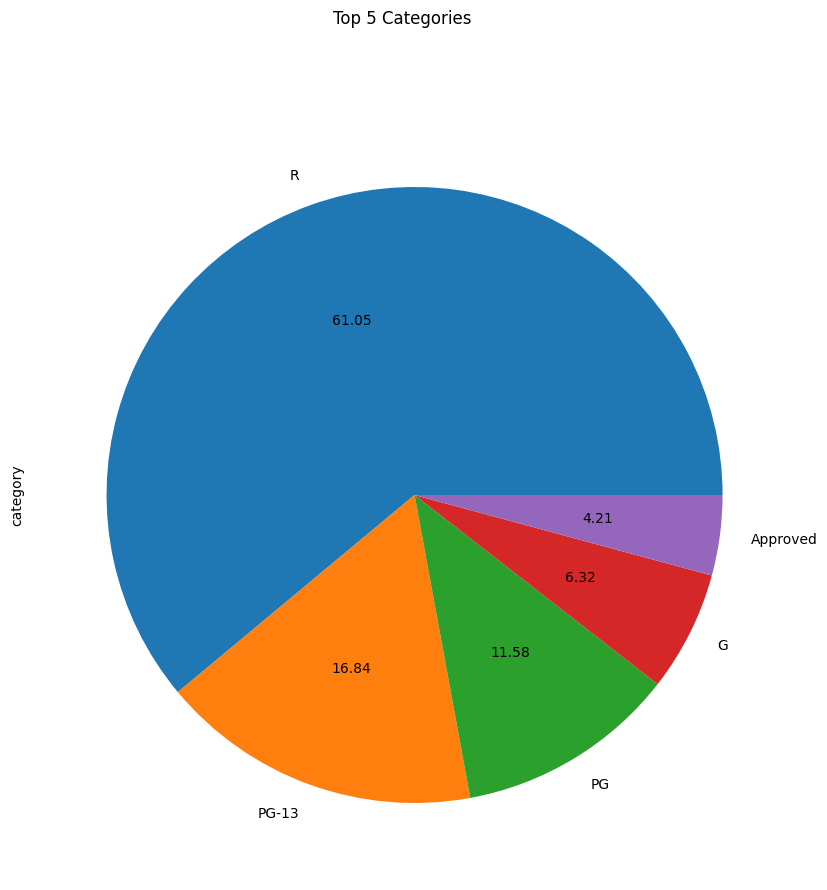

In [14]:
#produce a graph that shows the top 5 movie categories
df['category'].value_counts().head(5).plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Top 5 Categories')


In this section, we highlight the top 5 movie categories featured in the top 100 list. The **rated R** category leads as the top choice, constituting **61.05%** of the graph. Following closely in second place is the **PG-13** category. The **PG** category secures the third position, while the fourth and fifth spots are claimed by **Rated G** and **Approved** categories, respectively.



---

**Top 5 Movie Genres**



array([<Axes: ylabel='genre'>], dtype=object)

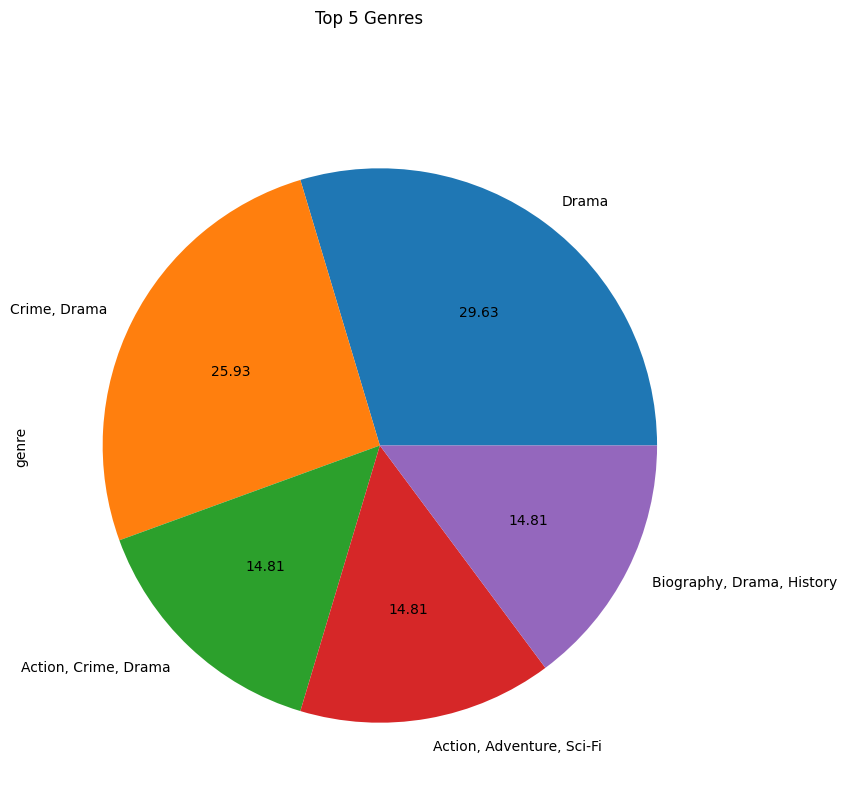

In [15]:
df['genre'].value_counts().head(5).plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(9,9), title='Top 5 Genres')

In the analysis of the Top 5 Movie Genres, it is focused on identifying the most prevalent genres within the top 100 list. At the forefront, *drama* claims the top spot, constituting **29.63%** of the overall distribution. Following closely are the combined genres of *Drama and Crime*, collectively accounting for **25.93%** of the pie chart. The third position is shared among three genre combinations: (*Action, Crime, Drama*), (*Action, Adventure, Sci-Fi*), and (*Biography, Drama, History*), each contributing **14.81%** to the graphical representation.



---

**Top 5 Movies with Highest IMDb Rating**



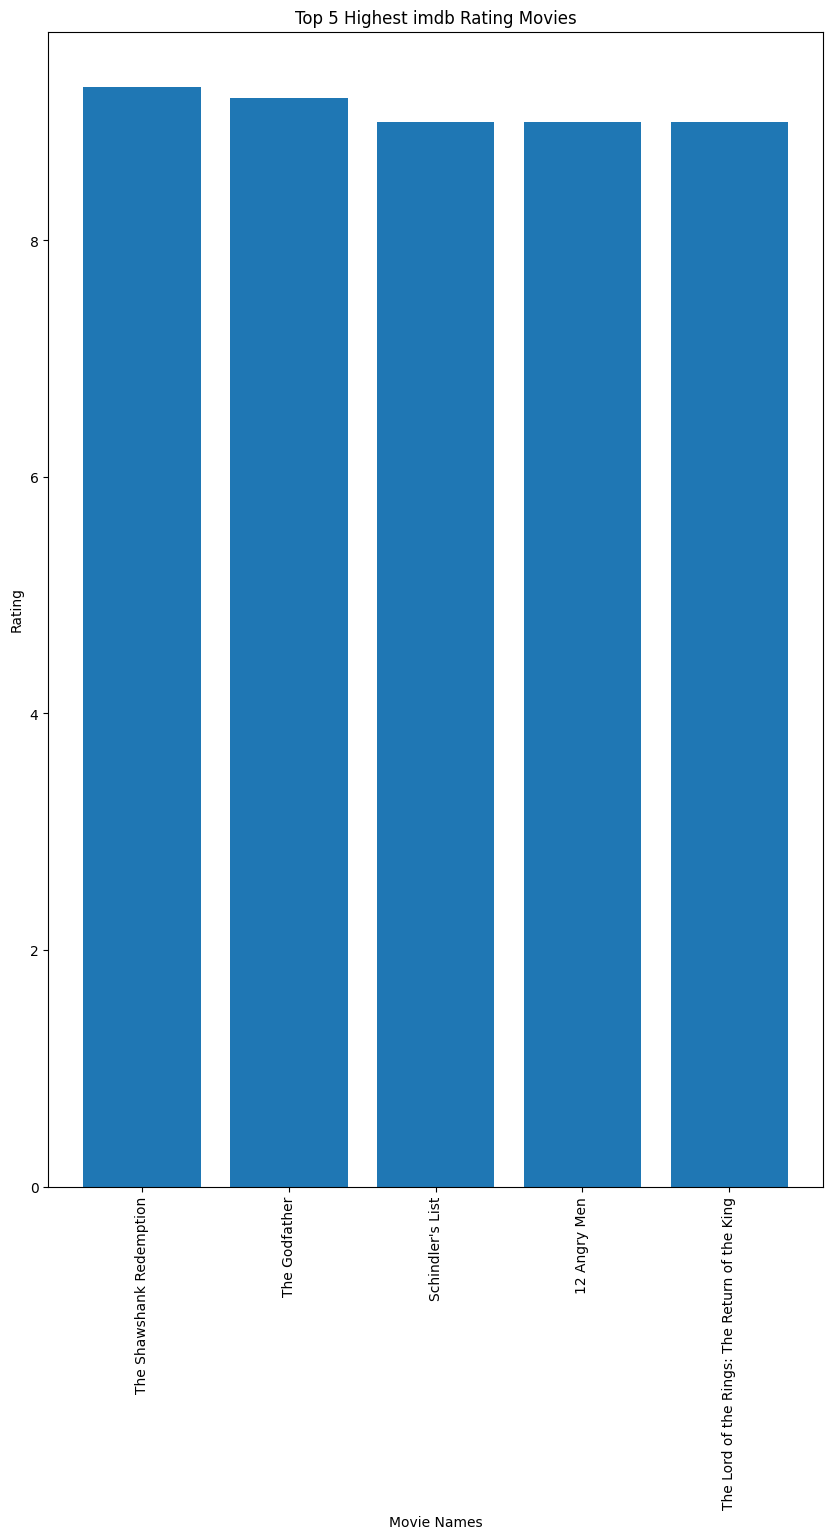

In [16]:
#Top 5 Highest imdb rating
top_5 = df.sort_values(by=['imdb_rating'],axis=0,ascending=False)[['movie_name','imdb_rating']].head(5)
plt.figure(figsize=(10,15))
ax=plt.bar(top_5.movie_name,top_5.imdb_rating)
plt.title('Top 5 Highest imdb Rating Movies')
plt.xlabel('Movie Names')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.show()

In our compilation of the top 5 movies with the highest IMDb ratings within our top 100 list, ***The Shawshank Redemption*** secures the first position. Following closely in the second spot is ***The Godfather***. The subsequent rankings are held by ***Schindler's List***, ***12 Angry Men***, and ***The Lord of the Rings: The Return of the King***, occupying the third, fourth, and fifth places, respectively.



---
**Top 5 Lowest IMDb Rating**


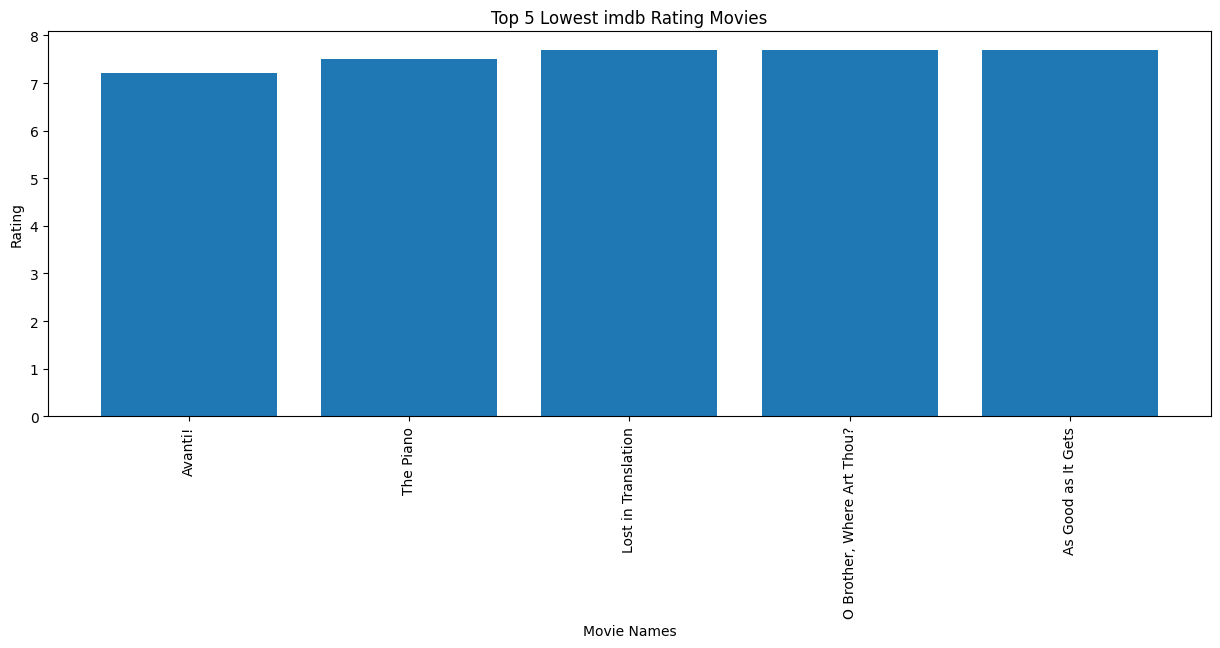

In [17]:
#Top 5 Lowest imdb rating
top_5 = df.sort_values(by=['imdb_rating'],axis=0,ascending=True)[['movie_name','imdb_rating']].head(5)
plt.figure(figsize=(15,5))
ax=plt.bar(top_5.movie_name,top_5.imdb_rating)
plt.title('Top 5 Lowest imdb Rating Movies')
plt.xlabel('Movie Names')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.show()

In our compilation of the top 5 movies with the **lowest IMDb ratings** within our top 100 list, the fifth position is occupied by the movie ***As Good as It Gets***. Following closely in the fourth spot is ***O Brother, Where Art Thou?***. Securing the third position is ***Lost in Translation***. ***The Piano*** claims the second spot, and finally, the movie with the lowest IMDb rating in our list is ***Avanti!***



---
**Top 5 Highest Grossing Movies**


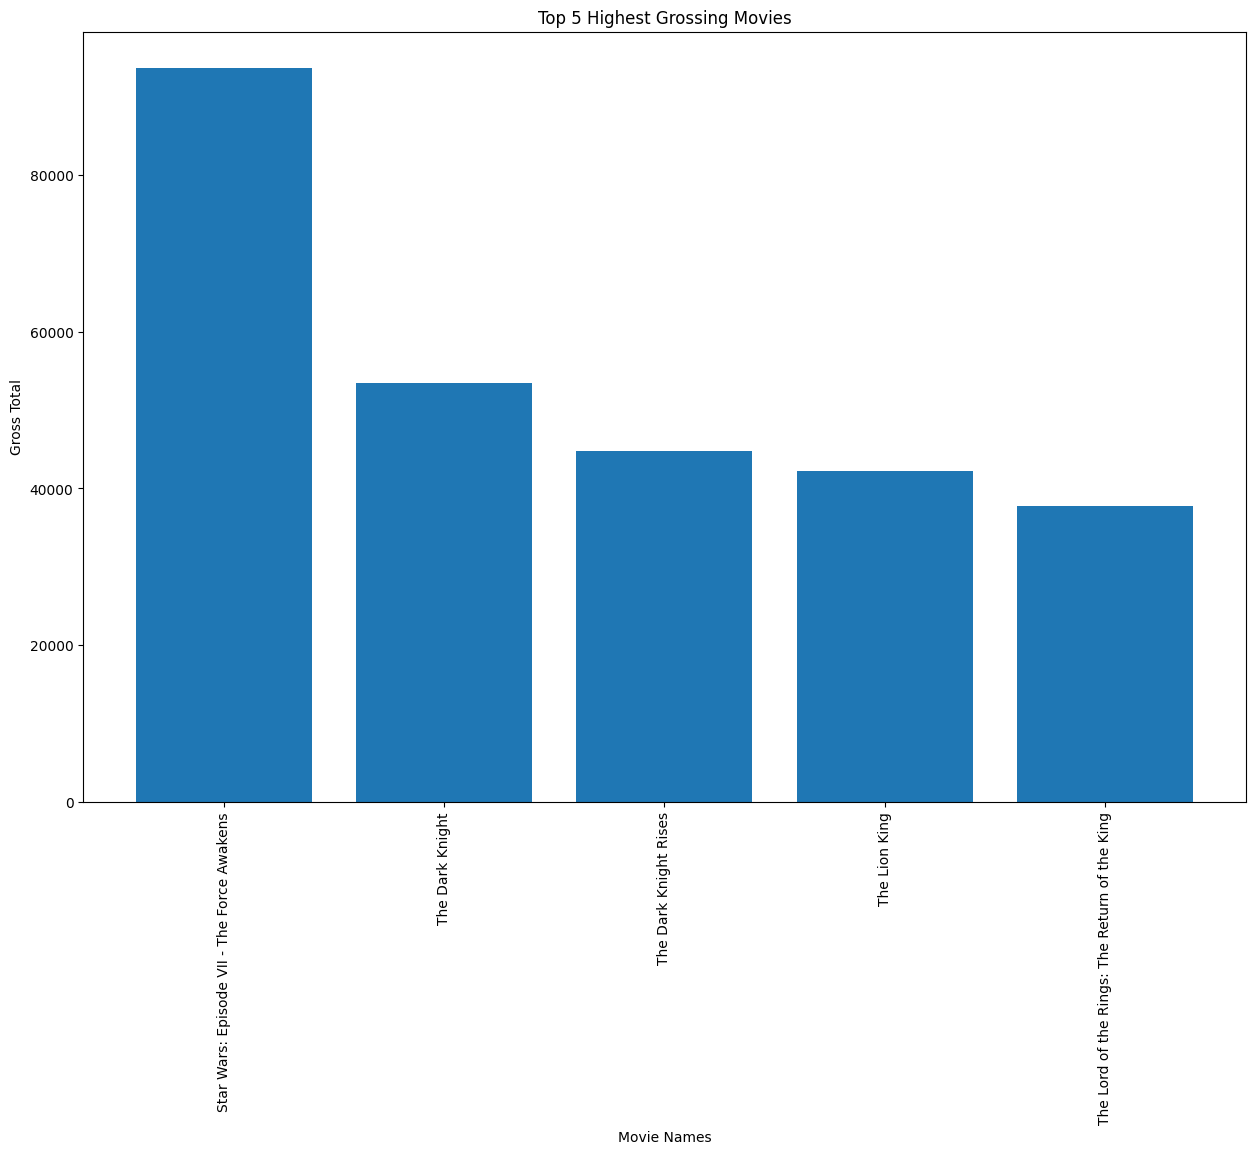

In [18]:
#Top 5 Highest Grossing Movies
top_5 = df.sort_values(by=['gross_total'],axis=0,ascending=False)[['movie_name','gross_total']].head(5)
plt.figure(figsize=(15,10))
ax = plt.bar(top_5.movie_name,top_5.gross_total)
plt.title('Top 5 Highest Grossing Movies')
plt.xlabel('Movie Names')
plt.xticks(rotation=90)
plt.ylabel('Gross Total')
plt.show()

In our ranking of the **Top 5 Highest Grossing Movies**, **"Star Wars: Episode VII - The Force Awakens"** secures the top spot, followed by **"The Dark Knight"** in second place. The third position is claimed by **"The Dark Knight Rises,"** with **"The Lion King"** taking the fourth spot. Finally, **"The Lord of the Rings: The Return of the King"** occupies the fifth position in our list.



---
**Top 5 Lowest Grossing Movies**


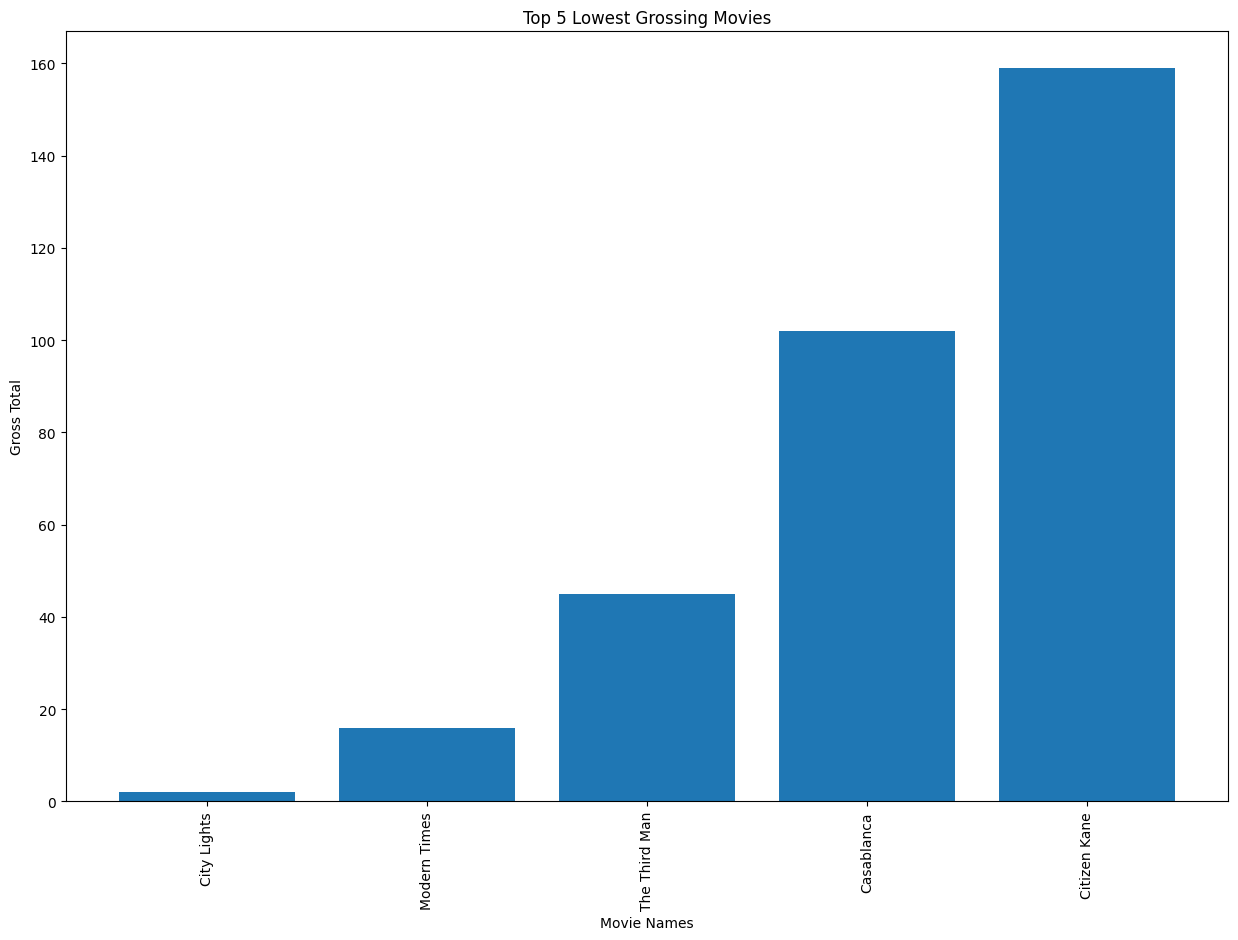

In [19]:
#Top 5 Lowest Grossing Movies
top_5 = df.sort_values(by=['gross_total'],axis=0,ascending=True)[['movie_name','gross_total']].head(5)
plt.figure(figsize=(15,10))
ax = plt.bar(top_5.movie_name,top_5.gross_total)
plt.title('Top 5 Lowest Grossing Movies')
plt.xlabel('Movie Names')
plt.xticks(rotation=90)
plt.ylabel('Gross Total')
plt.show()

In our compilation of the **Top 5 Lowest Grossing Movies**, ***Citizen Kane*** takes the fifth spot. Following closely is ***Casabianca*** in fourth place. Securing the third position is ***The Third Man***. The second position goes to ***Modern Times***. Finally, the lowest grossing movie on our list is "***City Lights***".

#Evaluation


Following the modeling phase, we successfully generated pertinent data supporting our conclusion to address the overarching problem statement. We presented two pie graphs illustrating the top five movie genres and categories, along with four bar graphs highlighting movies with the highest and lowest IMDb ratings and gross.

The modeling process yielded positive outcomes, effectively addressing our questions and the problem statement. The gathered data will be instrumental in subsequent analyses.

Upon scrutinizing the modeling results, we've identified key insights to form our conclusion. Specifically, genres such as Action, Drama, Crime, and Adventure tend to garner high IMDb ratings and gross. Additionally, within the category classification, PG-13 and R categories stand out as the primary contributors to high IMDb ratings and gross (Refer to the tables below).

In [20]:
#top 5 highest grossing movies table
df.loc[[79,10,78,30,8],:]

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
79,80.0,Star Wars: Episode VII - The Force Awakens,2015,PG-13,138,"Action, Adventure, Sci-Fi",7.8,"933,771",93666
10,11.0,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,"2,656,768",53486
78,79.0,The Dark Knight Rises,2012,PG-13,164,"Action, Drama",8.4,"1,708,002",44814
30,31.0,The Lion King,1994,G,88,"Animation, Adventure, Drama",8.5,"1,060,900",42278
8,9.0,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,"1,849,082",37785


In [21]:
#top 5 highest IMDb rating movies table
df.loc[[3,0,13,21,8],:]

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
3,4.0,The Shawshank Redemption,1994,R,142,Drama,9.3,"2,683,302",2834
0,1.0,The Godfather,1972,R,175,"Crime, Drama",9.2,"1,860,471",13497
13,14.0,Schindler's List,1993,R,195,"Biography, Drama, History",9.0,"1,357,621",9690
21,22.0,12 Angry Men,1957,Approved,96,"Crime, Drama",9.0,"792,729",436
8,9.0,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,"1,849,082",37785


To further support the claim, the response to our initial question reveals crucial insights into the top five movie genres and categories. Notably, ***Drama***, (***Action, Drama***), and (***Action, Crime, Drama***) emerge as the top three genres, all of which are represented in our top 5 movies concerning both the highest IMDb ratings and gross.

Regarding our final query, examining the top 5 movies in terms of both highest IMDb rating and gross indicates that only "***The Lord of the Rings: The Return of the King***" appears on both lists. Consequently, our analysis suggests that a high IMDb rating does not necessarily correlate with high gross.


In terms of recommendations, the creators propose the following:

For future studies, it is advised to expand the dataset size in the modeling phase. Utilizing only five movies in each category may limit the scope, and a more extensive dataset could provide a more comprehensive understanding. Additionally, consider acquiring a recent dataset for further analysis. Given the dynamic nature of trends and news, especially in the entertainment industry, up-to-date data is crucial for relevance and accuracy. Changes in preferences and cultural shifts from one generation to another may impact the details of such datasets.

#References


Pathak, M. (2023). IMDb Top 100 Movies: IMDb Top 100 Movies of All Time. Kaggle.

> https://www.kaggle.com/datasets/themrityunjaypathak/imdb-top-100-movies?resource=download



Waskom, M. (n.d.). seaborn.pairplot. Seaborn.

>  https://seaborn.pydata.org/generated/seaborn.pairplot.html



Tutorialspoint (n.d.). Python - Graphs. Tutorialspoint.

> https://www.tutorialspoint.com/python_data_structure/python_graphs.htm



Patil, P. (2018). What is Exploratory Data Analysis?. Towards Data Science.

> https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15



Stedman, C. (2022). data cleansing (data cleaning, data scrubbing). TechTarget.

> https://www.techtarget.com/searchdatamanagement/definition/data-scrubbing

